## This Notebook aims to answer the following questions:
**Q1: Do movies (a) or shows (b) on Netflix with an older release year have a better average IMDb ratings?**

**Q2: Do movies (a) or shows (b) on Netflix with a more positive description get better IMDb ratings?**

**Q3: Do movies or shows on Netflix get better IMDb ratings (a) or more IMDb votes (b)?**

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
from matplotlib.ticker import FixedLocator, FuncFormatter
from scipy.stats import pearsonr
from transformers import pipeline
from scipy import stats
from statsmodels.stats.multicomp import pairwise_tukeyhsd
from typing import Optional, Dict, List, Tuple
from scipy.stats import levene

In [4]:
df = pd.read_csv("Netflix data classified")
df = df.drop(columns=["Unnamed: 0", "index"], axis=1)

In [5]:
# BERT model (used because it performed the best in A3)
# the classification was stored and exported, so it doesn't have to be run every time

# original Data Source: 
# https://www.kaggle.com/datasets/thedevastator/netflix-imdb-scores?resource=download

# df = pd.read_csv("Netflix TV Shows and Movies.csv")
# df.drop(["id", "imdb_id"], axis=1, inplace=True)

# sentiment_pipeline = pipeline(model=f"cardiffnlp/twitter-roberta-base-sentiment-latest")
# df = df.dropna(subset=["description"]) 
# df_class = sentiment_pipeline(df["description"].to_list())
# df["Bert_class"] = [result["label"] for result in df_class]

# df.to_csv("Netflix data classified", sep=",")

In [6]:
df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,5278.000000,5278.000000,5278.000000,5.263000e+03
mean,2015.878363,79.210117,6.534236,2.342496e+04
std,7.348958,38.928918,1.160390,8.716504e+04
min,1953.000000,0.000000,1.500000,5.000000e+00
25%,2015.000000,45.000000,5.800000,5.220000e+02
50%,2018.000000,87.000000,6.600000,2.281000e+03
75%,2020.000000,106.000000,7.400000,1.015500e+04
max,2022.000000,235.000000,9.600000,2.268288e+06


## Q1: Do movies (a) or shows (b) on Netflix with an older release year have a better average IMDb ratings?

In [7]:
def year_rating_r(type: str, data: pd.DataFrame = df) -> Tuple[float]:
    
    filtered_df = data[data["type"] == type]
    filtered_df_mean = filtered_df.groupby("release_year")["imdb_score"].mean()

    r, p = pearsonr(filtered_df_mean.index, filtered_df_mean)
    
    return filtered_df, filtered_df_mean, r, p

#Movies
movies_df, movies_df_mean, r, p = year_rating_r("MOVIE")
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r:.2f}, p = {p:.4f}.\n")

#Shows
shows_df, shows_df_mean, r, p = year_rating_r("SHOW")
print(f"No relationship between the release year and the IMDb ratings were found for Netflix shows, r = {r:.2f}, p = {p:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.43, p = 0.0003.

No relationship between the release year and the IMDb ratings were found for Netflix shows, r = 0.01, p = 0.9555.


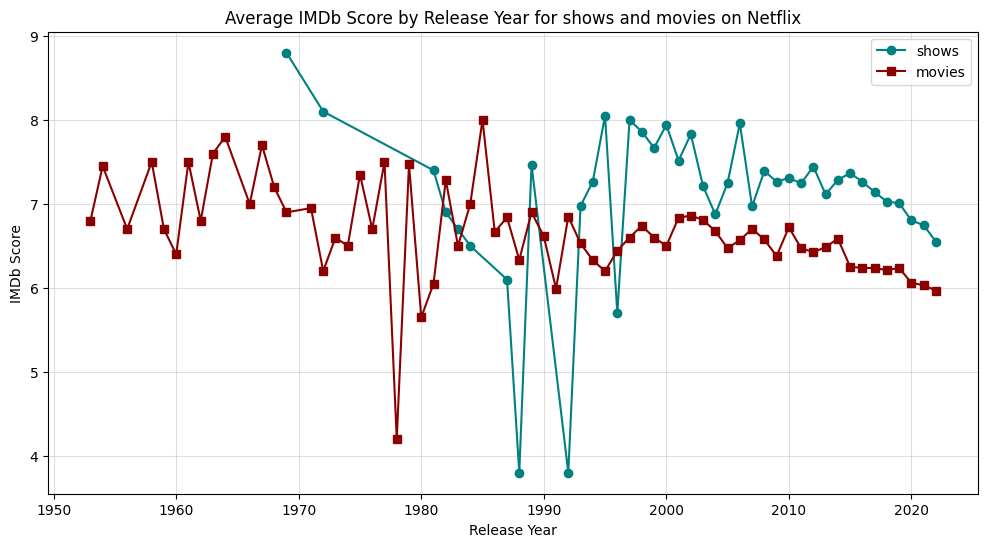

In [8]:
plt.figure(figsize=(12, 6))
plt.plot(
    shows_df_mean.index,
    shows_df_mean,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_df_mean.index,
    movies_df_mean,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("IMDb Score")
plt.title("Average IMDb Score by Release Year for shows and movies on Netflix")
plt.grid(True, alpha=.4)
plt.legend()
#1978 only one movie "Bandie"

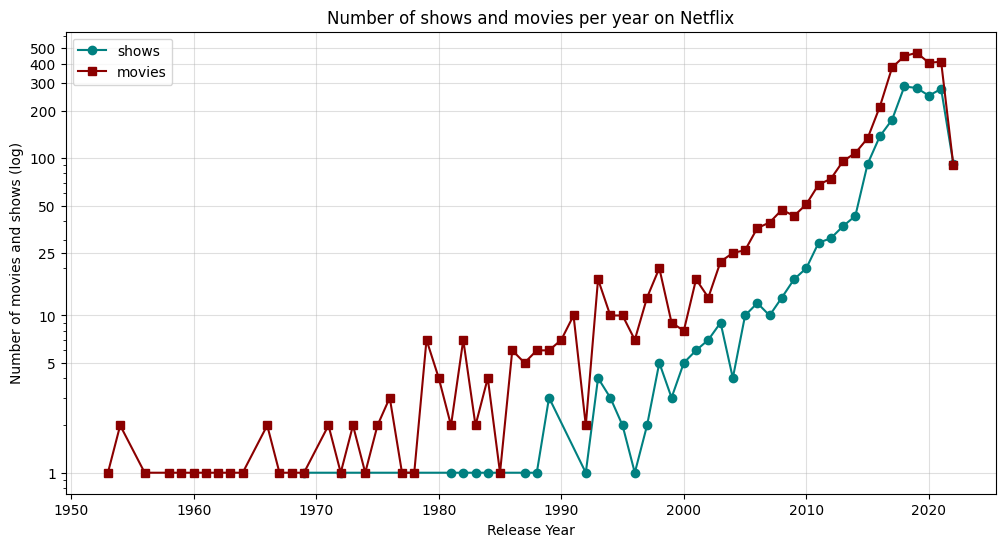

In [9]:
movies_year = movies_df.groupby("release_year")["release_year"].count()
shows_year = shows_df.groupby("release_year")["release_year"].count()

plt.figure(figsize=(12, 6))
plt.plot(
    shows_year.index,
    shows_year,
    color="teal",
    marker="o",
    label="shows"
)

plt.plot(
    movies_year.index,
    movies_year,
    color="darkred",
    marker="s",
    label="movies"
)

plt.xlabel("Release Year")
plt.ylabel("Number of movies and shows (log)")
plt.yscale("log")

ax = plt.gca()
custom_ticks = [1, 5, 10, 25, 50, 100, 200, 300, 400, 500]
ax.yaxis.set_major_locator(FixedLocator(custom_ticks))
ax.yaxis.set_major_formatter(FuncFormatter(lambda x, p: f'{int(x):,}'))

plt.title("Number of shows and movies per year on Netflix")
plt.grid(True, alpha=.4)
plt.legend()

In [10]:
#Analysis starting year 2000
df_filtered = df[df["release_year"] >= 2000]
#Movies
movies_df_filterd, movies_df_mean_filtered, r_filtered, p_filtered = year_rating_r("MOVIE", df_filtered)
print(f"Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r_filtered:.2f}, p = {p_filtered:.4f}.\n")

#Shows
showss_df_filterd, shows_df_mean_filtered, r_filtered, p_filtered = year_rating_r("SHOW", df_filtered)
print(f"Shows on Netflix with a more recent release year on average have worse ratings on IMDb, r = {r_filtered:.2f}, p = {p_filtered:.4f}.")

Movies on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.87, p = 0.0000.

Shows on Netflix with a more recent release year on average have worse ratings on IMDb, r = -0.68, p = 0.0004.


In [11]:
movies_df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,3403.000000,3403.000000,3403.000000,3.388000e+03
mean,2015.200118,101.569791,6.267793,2.670682e+04
std,8.226595,27.756713,1.116425,9.474863e+04
min,1953.000000,8.000000,1.500000,5.000000e+00
25%,2014.000000,88.000000,5.600000,5.807500e+02
50%,2018.000000,100.000000,6.400000,2.640000e+03
75%,2020.000000,116.000000,7.100000,1.228875e+04
max,2022.000000,235.000000,9.000000,2.268288e+06


In [12]:
shows_df.describe()

,release_year,runtime,imdb_score,imdb_votes
count,1875.000000,1875.000000,1875.000000,1.875000e+03
mean,2017.109333,38.628800,7.017813,1.749487e+04
std,5.183536,17.696716,1.079840,7.108993e+04
min,1969.000000,0.000000,1.600000,5.000000e+00
25%,2016.000000,24.000000,6.450000,4.450000e+02
50%,2018.000000,41.000000,7.200000,1.794000e+03
75%,2020.000000,49.000000,7.800000,7.218500e+03
max,2022.000000,178.000000,9.600000,1.727694e+06


## Q2: Do movies (a) or shows (b) on Netflix with a more positive description get better IMDb ratings?

Homogeneity of Variances (Homoscedasticity):
Levene's Test Statistic: 2.71
Levene's Test p-value: 0.066
There is no significant evidence to reject the null hypothesis of equal variances.

One-way ANOVA Results:
F-statistic: 20.53
p-value: 0.000

Summary Statistics:
            count  mean  median   std  min  max
Bert_class                                     
negative      839  6.08     6.2  1.15  1.5  8.7
neutral      2025  6.29     6.4  1.08  1.7  9.0
positive      524  6.46     6.6  1.15  2.1  9.0

The p-value (0.000) is less than 0.05.
There is a statistically significant difference in imdb_score across sentiment categories.

Tukey's HSD Pairwise Comparisons:
 Multiple Comparison of Means - Tukey HSD, FWER=0.05  
 group1   group2  meandiff p-adj  lower  upper  reject
------------------------------------------------------
negative  neutral   0.2118    0.0  0.105 0.3187   True
negative positive   0.3824    0.0 0.2375 0.5273   True
 neutral positive   0.1706 0.0049  0.043 0.2982   Tru

<Figure size 1200x800 with 0 Axes>

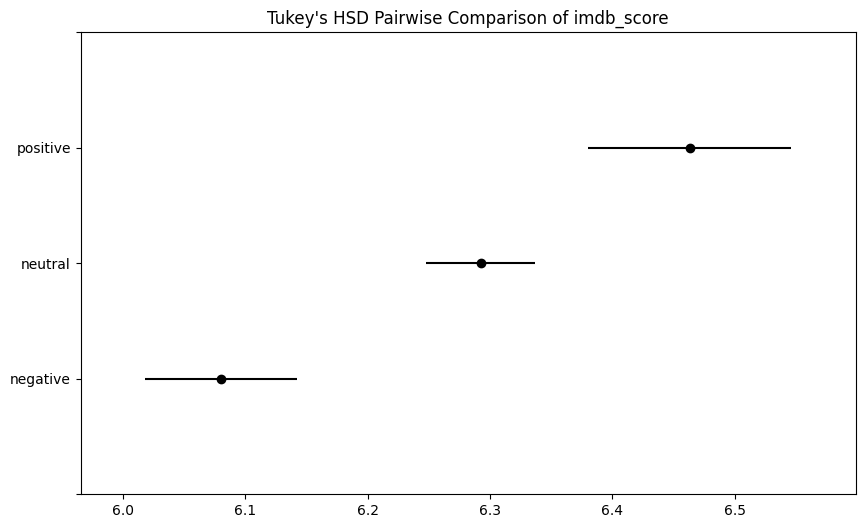

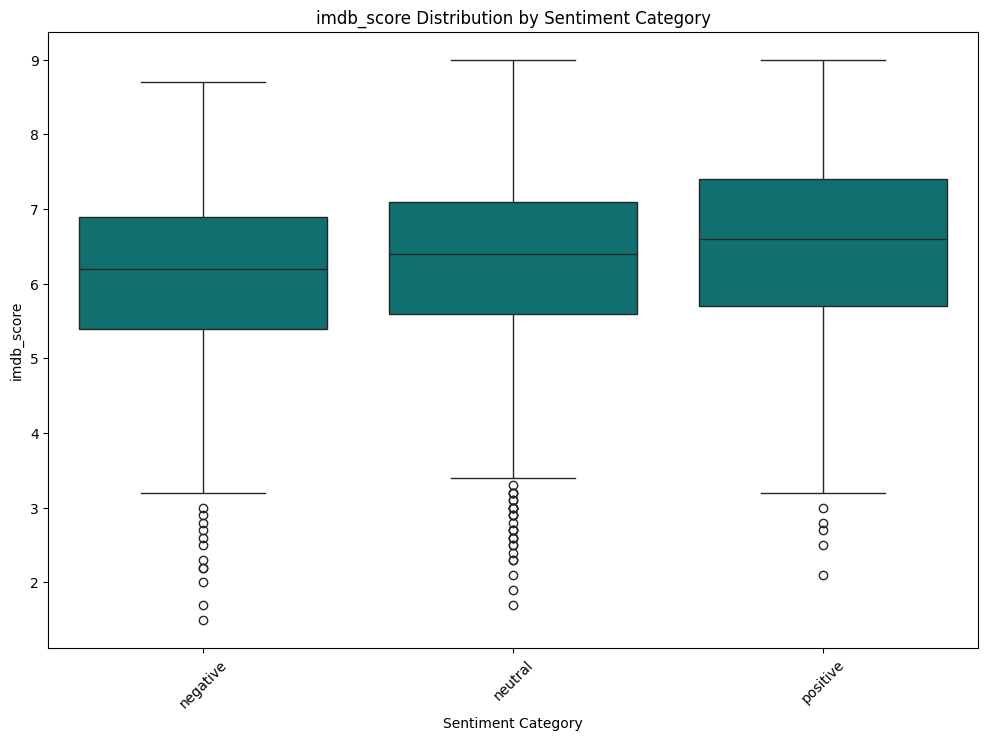

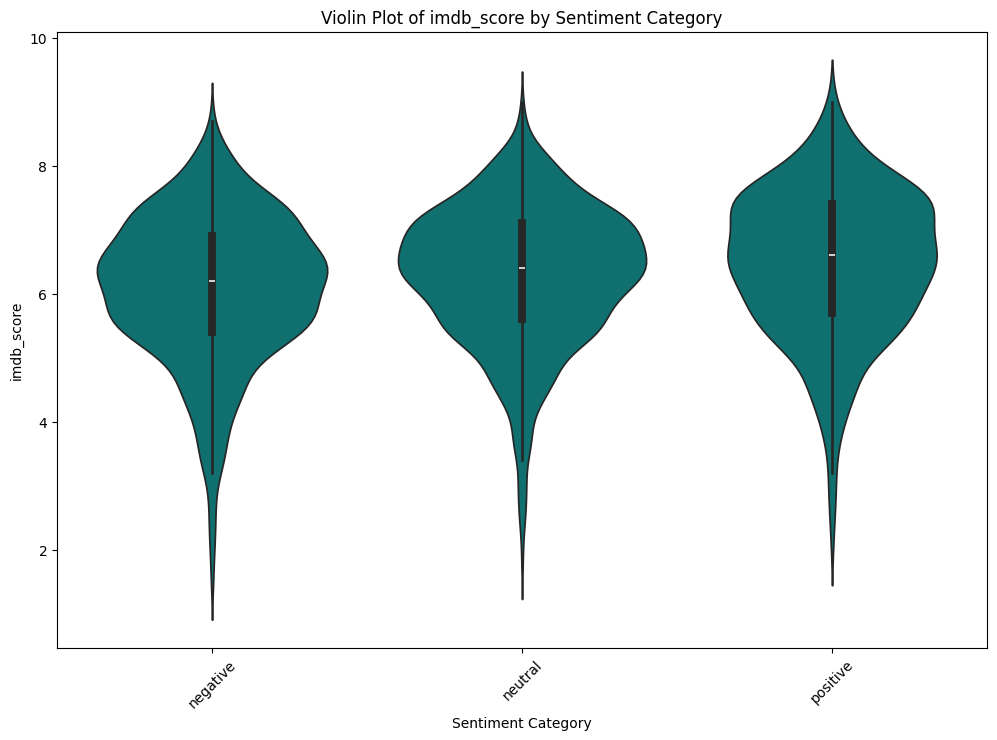

In [44]:
def sentiment_anova(data: pd.DataFrame, column: str, grouping: str ="Bert_class", alpha: float = .05) -> None:
    """
    Perform a levene test, ANOVA and shows pairwise comparison and then plot the pairwise comparison, box plot and violin plot with the data.

    Parameters:

        data (DataFrame): dataset used.
        column (str): column name from the DataFrame to use for the comparison
        grouping (str): column name by which to group the data by

    Returns:
        None
    """
    # Group the data by sentiment category
    sentiment_groups = [group[column].values for name, group in data.groupby(grouping, observed=False)]

    # Perform Levene's test
    stat, p_value = levene(*sentiment_groups)

    print("Homogeneity of Variances (Homoscedasticity):")
    print(f"Levene's Test Statistic: {stat:.2f}")
    print(f"Levene's Test p-value: {p_value:.3f}")

    if p_value < 0.05:
        print("There is significant evidence to reject the null hypothesis of equal variances.")
    else:
        print("There is no significant evidence to reject the null hypothesis of equal variances.")
        
    # Perform one-way ANOVA
    f_statistic, p_value = stats.f_oneway(*sentiment_groups)
    print("\nOne-way ANOVA Results:")
    print(f"F-statistic: {f_statistic:.2f}")
    print(f"p-value: {p_value:.3f}")

    # Summary statistics
    summary_stats = data.groupby(grouping, observed=False)[column].agg([
        ("count", "count"),
        ("mean", "mean"),
        ("median", "median"),
        ("std", "std"),
        ("min", "min"),
        ("max", "max")
    ])
    summary_stats = summary_stats.round(2)
    print("\nSummary Statistics:")
    print(summary_stats)
    
    if p_value < alpha:
        print(f"\nThe p-value ({p_value:.3f}) is less than {alpha}.")
        print(f"There is a statistically significant difference in {column} across sentiment categories.")
        # Perform Tukey's HSD Test for pairwise comparisons
        tukey_results = pairwise_tukeyhsd(endog=data[column], groups=data[grouping], alpha=0.05)
        print("\nTukey's HSD Pairwise Comparisons:")
        print(tukey_results)
        # Visualization of Tukey's HSD results
        plt.figure(figsize=(12, 8))
        tukey_results.plot_simultaneous()
        plt.title(f"Tukey's HSD Pairwise Comparison of {column}")
    else:
        print(f"\nThe p-value ({p_value:.3f}) is greater than {alpha}.")
        print(f"There is no statistically significant difference in {column} across sentiment categories.\nNo further analysis will be performed.")

    # Visualization of distribution
    plt.figure(figsize=(12, 8))
    sns.boxplot(x=grouping, y=column, data=data, color="teal")
    plt.title(f"{column} Distribution by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel(column)
    plt.xticks(rotation=45)

    # Additional violin plot
    plt.figure(figsize=(12, 8))
    sns.violinplot(x=grouping, y=column, data=data, color="teal")
    plt.title(f"Violin Plot of {column} by Sentiment Category")
    plt.xlabel("Sentiment Category")
    plt.ylabel(column)
    plt.xticks(rotation=45)
    
    return None

sentiment_anova(movies_df, "imdb_score")

Homogeneity of Variances (Homoscedasticity):
Levene's Test Statistic: 7.28
Levene's Test p-value: 0.001
There is significant evidence to reject the null hypothesis of equal variances.

One-way ANOVA Results:
F-statistic: 4.01
p-value: 0.018

The p-value (0.018) is less than 0.05.
There is a statistically significant difference in imdb_score across sentiment categories.

Summary Statistics:
            count  mean  median   std  min  max
Bert_class                                     
negative      363  7.05     7.2  0.99  2.3  9.5
neutral      1114  7.06     7.2  1.06  1.6  9.6
positive      398  6.88     7.0  1.21  2.3  9.6

Tukey's HSD Pairwise Comparisons:
  Multiple Comparison of Means - Tukey HSD, FWER=0.05   
 group1   group2  meandiff p-adj   lower   upper  reject
--------------------------------------------------------
negative  neutral   0.0096  0.988 -0.1432  0.1625  False
negative positive  -0.1649 0.0885 -0.3485  0.0186  False
 neutral positive  -0.1746 0.0155 -0.3222 -0.02

<Figure size 1200x800 with 0 Axes>

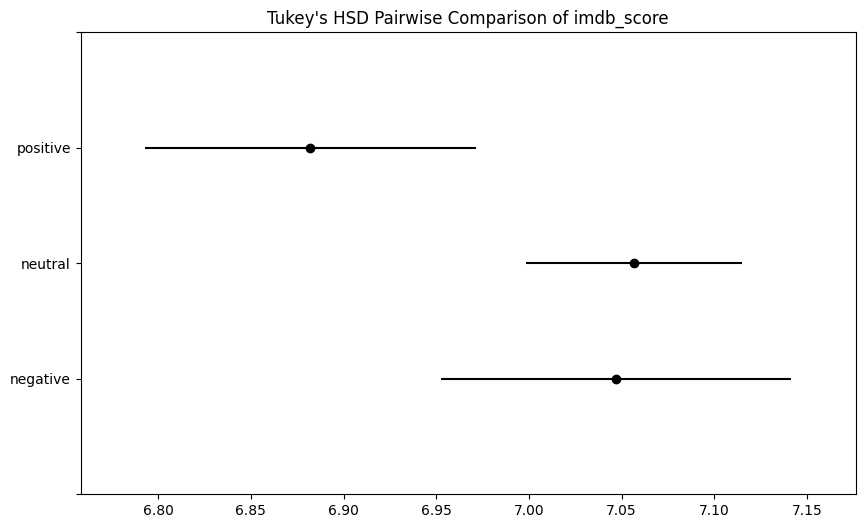

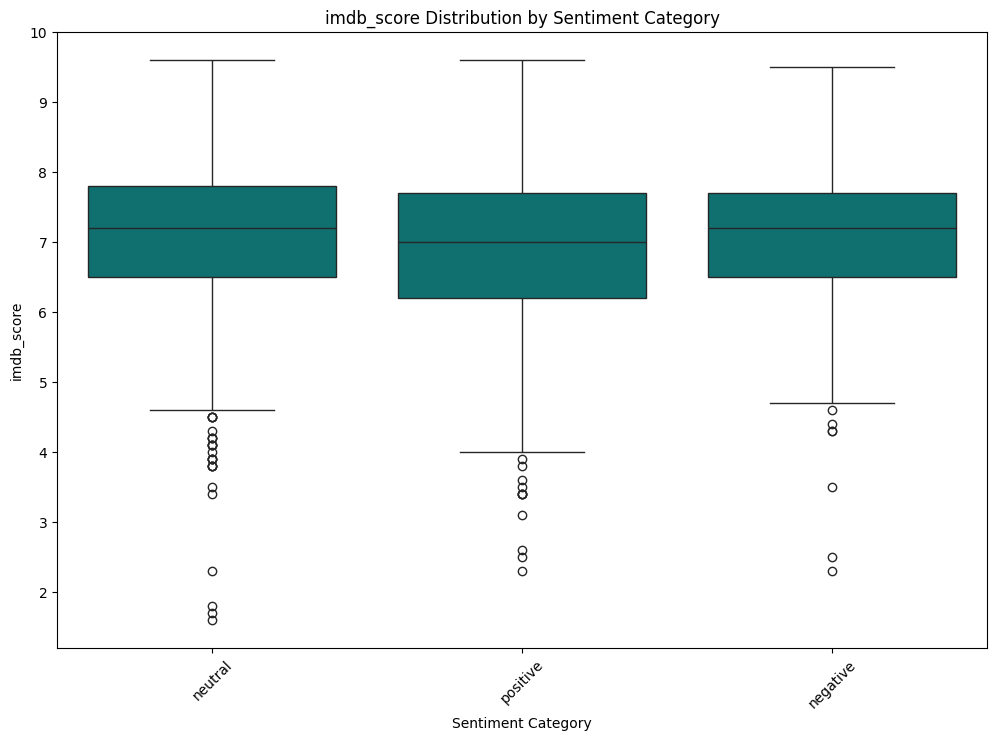

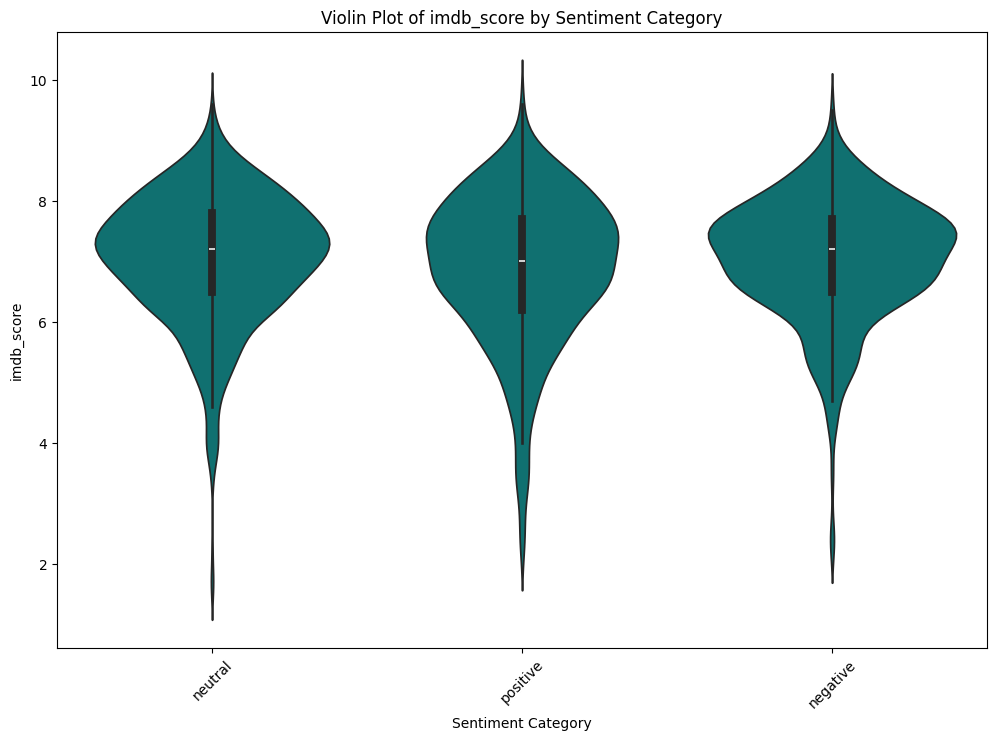

In [14]:
sentiment_anova(shows_df, "imdb_score")

In [41]:
# random permutation test multiple groups:
def compute_test_statistic(data: pd.DataFrame, column: str, grouping: str) -> float:
    """
    Compute the F-statistic (between-group variance / within-group variance)
    Similar to one-way ANOVA test statistic
    """
    group_means = data.groupby(grouping)[column].mean()
    overall_mean = data[column].mean()
    group_sizes = data.groupby(grouping).size()
    
    between_group_variance = sum(
        group_sizes[label] * (group_mean - overall_mean)**2 
        for label, group_mean in group_means.items()
    ) / (len(group_means) - 1)
    
    within_group_variance = sum(
        ((data[data[grouping] == label][column] - group_mean)**2).sum()
        for label, group_mean in group_means.items()
    ) / (len(data) - len(group_means))
    
    f_statistic = between_group_variance / within_group_variance
    return f_statistic

def permutation_test_multiple_groups(
    data: pd.DataFrame, 
    column: str, 
    grouping: str = "Bert_class", 
    n_permutations: int = 10_000,
    random_state: Optional[int] = None
) -> Dict:
    """
    Perform an omnibus permutation test to check for overall group differences.
    """
    if column not in data.columns:
        raise ValueError(f"Column '{column}' not found in the DataFrame")
    if grouping not in data.columns:
        raise ValueError(f"Grouping column '{grouping}' not found in the DataFrame")
    
    if random_state is not None:
        np.random.seed(random_state)

    observed_statistic = compute_test_statistic(data, column, grouping)
    perm_stats = []
    for _ in range(n_permutations):
        permuted_data = data.copy()
        permuted_data[grouping] = np.random.permutation(permuted_data[grouping])
        perm_stat = compute_test_statistic(permuted_data, column, grouping)
        perm_stats.append(perm_stat)

    p_value = np.mean(np.array(perm_stats) >= observed_statistic)
    results = {
        'observed_statistic': observed_statistic,
        'p_value': p_value,
        'group_means': dict(data.groupby(grouping)[column].mean()),
        'group_sizes': dict(data.groupby(grouping).size()),
        'permutation_stats': perm_stats 
    }

    print("Omnibus Permutation Test Results:")
    print(f"F-statistic: {observed_statistic:.2f}")
    print(f"p-value: {'p < .001' if p_value < .001 else f'{p_value:.3f}'}")
    print("\nGroup Means:")
    for group, mean in results['group_means'].items():
        print(f"{group}: {mean:.2f}")

    return results

def pairwise_permutation_test(
    data: pd.DataFrame, 
    column: str, 
    grouping: str = "Bert_class", 
    n_permutations: int = 10_000,
    random_state: Optional[int] = None,
    correction: str = 'bonferroni'
) -> Dict[Tuple[str, str], Dict]:
    """
    Perform pairwise permutation tests ONLY if the omnibus test is significant.
    """
    groups = data[grouping].unique()
    pairwise_results = {}
    
    for i in range(len(groups)):
        for j in range(i+1, len(groups)):
            group1, group2 = groups[i], groups[j]
            group_data = data[data[grouping].isin([group1, group2])]
            mean1 = group_data[group_data[grouping] == group1][column].mean()
            mean2 = group_data[group_data[grouping] == group2][column].mean()
            observed_diff = abs(mean1 - mean2)
            
            perm_diffs = []
            for _ in range(n_permutations):
                permuted_data = group_data.copy()
                permuted_data[grouping] = np.random.permutation(permuted_data[grouping])
                perm_mean1 = permuted_data[permuted_data[grouping] == group1][column].mean()
                perm_mean2 = permuted_data[permuted_data[grouping] == group2][column].mean()
                perm_diff = abs(perm_mean1 - perm_mean2)
                perm_diffs.append(perm_diff)
            
            p_value = np.mean(np.array(perm_diffs) >= observed_diff)
            pairwise_results[(group1, group2)] = {
                'mean_difference': observed_diff,
                'p_value': p_value,
                'group1_mean': mean1,
                'group2_mean': mean2
            }
    
    if correction.lower() == 'bonferroni':
        num_tests = len(pairwise_results)
        for key in pairwise_results:
            pairwise_results[key]['adjusted_p_value'] = min(
                pairwise_results[key]['p_value'] * num_tests, 1.0
            )
    
    print("\nPairwise Permutation Test Results:")
    for (group1, group2), results in pairwise_results.items():
        p_value = "p < .001" if results['p_value'] < 0.001 else f"p = {results['p_value']:.3f}"
        adjusted_p_value = "p < .001" if results['adjusted_p_value'] < 0.001 else f"p = {results['adjusted_p_value']:.3f}"
        
        print(f"\n{group1} vs {group2}:")
        print(f"Mean Difference: {results['mean_difference']:.2f}")
        print(f"p-value: {p_value}")
        if correction.lower() == 'bonferroni':
            print(f"Adjusted p-value (Bonferroni): {adjusted_p_value}")
    
    return pairwise_results

def plot_permutation_distribution(
    results: Dict, 
    column: str, 
    grouping: str = "Bert_class"
) -> Dict:
    """
    Perform permutation test and create a visualization of the permutation distribution.
    """
    observed_statistic = results['observed_statistic']
    p_value = results['p_value']
    perm_stats = results['permutation_stats']

    plt.figure(figsize=(12, 8))
    sns.histplot(perm_stats, kde=True, color='skyblue', alpha=0.7)
    plt.axvline(observed_statistic, color='red', linestyle='dashed', linewidth=2, 
                label=f'Observed Statistic: {observed_statistic:.2f}')
    plt.title(f'Permutation Distribution\n{column} across {grouping}')
    plt.xlabel('F-statistic')
    plt.ylabel('Frequency')
    plt.legend()
    plt.annotate(f'p-value: {p_value:.3f}', 
                 xy=(0.95, 0.95), xycoords='axes fraction', 
                 horizontalalignment='right', verticalalignment='top')

    return {
        'results': results,
        'permutation_stats': perm_stats
    }

def plot_pairwise_comparisons(
    data: pd.DataFrame, 
    column: str, 
    grouping: str = "Bert_class",
    pairwise_results: Dict = None, 
    alpha: float = 0.05
) -> Dict:
    """
    Create a visualization of pairwise group comparisons with statistical significance.
    """
    if pairwise_results is None:
        pairwise_results = pairwise_permutation_test(data, column, grouping)

    plt.figure(figsize=(12, 6))
    sns.violinplot(x=grouping, y=column, data=data, color="teal")
    plt.title(f'Pairwise Comparisons: {column} across {grouping}')
    plt.xlabel(grouping)
    plt.ylabel(column)
    plt.xticks(rotation=45)
    
    groups = sorted(data[grouping].unique())
    y_max = data[column].max()
    y_step = (data[column].max() - data[column].min()) * 0.1
    comparison_y_pos = y_max + y_step
    for (group1, group2), results in pairwise_results.items():
        if results['adjusted_p_value'] <= alpha:
            idx1 = groups.index(group1)
            idx2 = groups.index(group2)
            adjusted_p_value = f' < .001' if results["adjusted_p_value"] < .001 else f'= {results["adjusted_p_value"]:.3f}'
            plt.plot([idx1, idx2], [comparison_y_pos, comparison_y_pos], 
                     color='red', linewidth=1)
            plt.text((idx1 + idx2) / 2, comparison_y_pos, 
                     f'p-value (adj.) {adjusted_p_value}', 
                     horizontalalignment='center', 
                     verticalalignment='bottom',
                     color='red')
            comparison_y_pos += y_step

    plt.ylim(top=comparison_y_pos + y_step)
        
    return pairwise_results


def analyze_group_differences(
    data: pd.DataFrame, 
    column: str, 
    grouping: str = "Bert_class",
    random_state: Optional[int] = 42,
    n_permutations: int = 10_000,
    plot: bool = True
    ) -> Dict:
    """
    Main function: Comprehensive group difference analysis workflow - omnibus test, pairwise comparisons, and
    visualizations.
    """
    omnibus_results = permutation_test_multiple_groups(data, column, grouping, n_permutations, random_state)

    if plot:
        plot_permutation_distribution(omnibus_results, column, grouping)

    if omnibus_results['p_value'] <= 0.05:
        print("\nOmnibus Permutation Test is significant, proceeding to pairwise comparisons:")
        pairwise_results = pairwise_permutation_test(data, column, grouping, n_permutations, random_state)
        if plot:
            plot_pairwise_comparisons(data, column, grouping, pairwise_results)
        return None
    else:
        print("\nOmnibus Permutation Test didn't reach significance, no further analysis required.")
    return None

Omnibus Permutation Test Results:
F-statistic: 20.53
p-value: p < .001

Group Means:
negative: 6.08
neutral: 6.29
positive: 6.46

Omnibus Permutation Test is signigicant, proceeding to pairwise comparisons:

Pairwise Permutation Test Results:

negative vs neutral:
Mean Difference: 0.21
P-value: p < .001
Adjusted P-value (Bonferroni): p < .001

negative vs positive:
Mean Difference: 0.38
P-value: p < .001
Adjusted P-value (Bonferroni): p < .001

neutral vs positive:
Mean Difference: 0.17
P-value: p < .001
Adjusted P-value (Bonferroni): p = 0.002


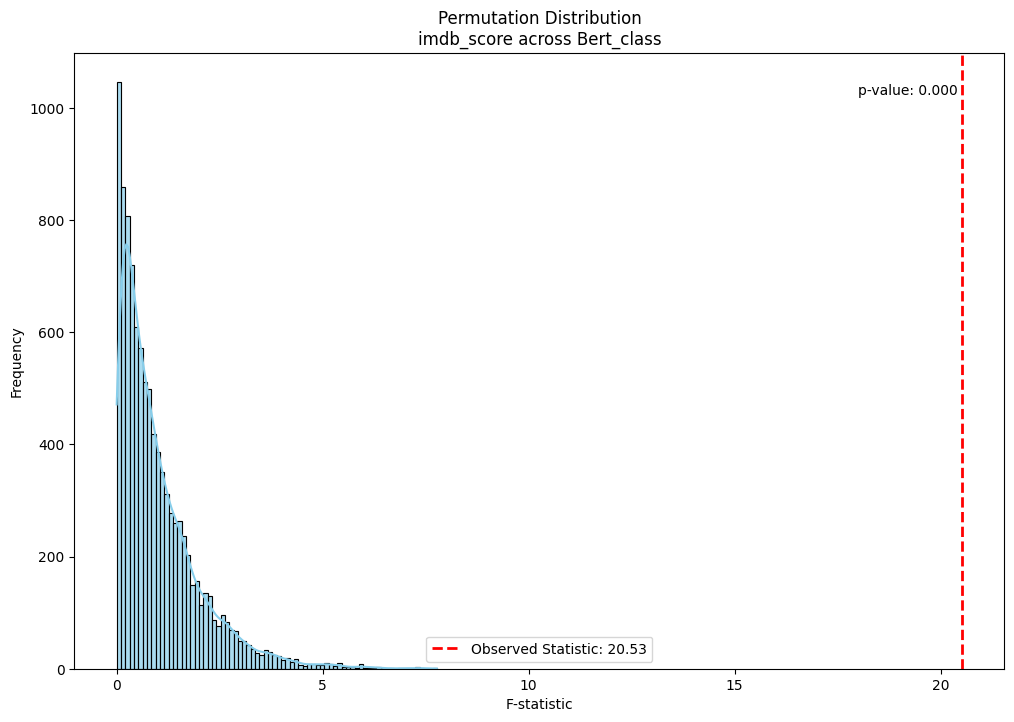

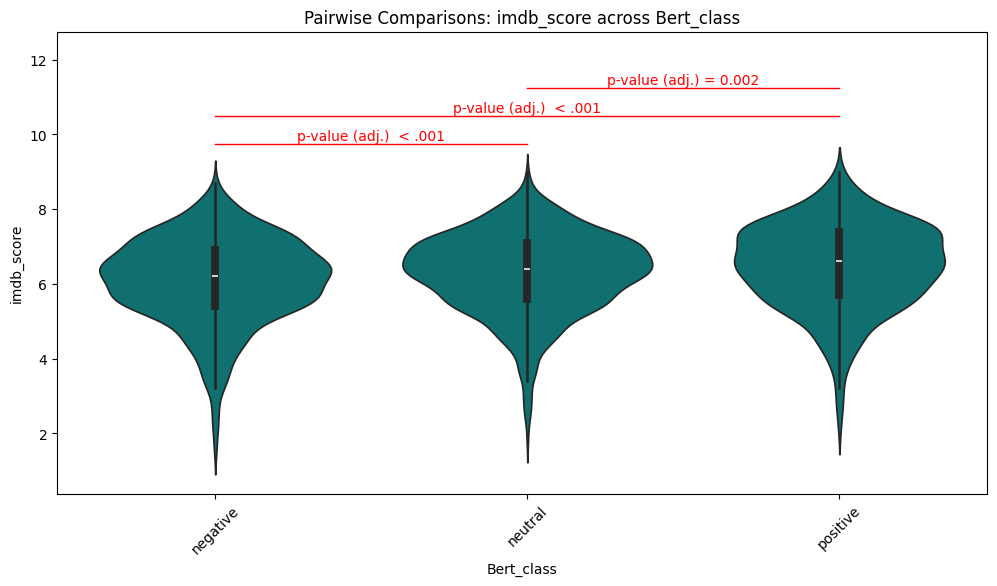

In [42]:
analyze_group_differences(movies_df, "imdb_score")

## Q3: Do movies or shows on Netflix get better IMDb ratings (a) or more IMDb votes (b)?

In [17]:
def permutation_test(data1: pd.DataFrame,
                     data2: pd.DataFrame,
                     group1_name: str = "group_1",
                     group2_name: str = "group_2" ,
                     num_permutations: int = 10_000) -> Tuple[float, float, list[float]]:
    """
    Perform a random permutation test to compare two datasets and print the differences (if there are any).

    Parameters:
        data1 (DataFrame): First dataset.
        group1_name (str): name of the first dataset.
        data2 (DataFrame): Second dataset.
        group2_name (str): name of the second dataset.
        num_permutations (int): Number of permutations to perform.

    Returns:
        p_value (float): The p-value for the test.
        observed_diff (float): Observed difference between means.
        permuted_diff list[float]: 
    """
    # Combine the datasets
    combined = np.concatenate([data1, data2])
    # Calculate the observed difference in means
    observed_diff = np.mean(data1) - np.mean(data2)
    # List to store permutation differences
    permuted_diffs = []
    # Initialize a counter for permutations with more extreme differences
    extreme_count = 0
    
    for _ in range(num_permutations):
        # Shuffle the combined data
        np.random.shuffle(combined)
        # Split the shuffled data into two groups of the original sizes
        permuted_data1 = combined[:len(data1)]
        permuted_data2 = combined[len(data1):]
        # Calculate the difference in means for this permutation
        permuted_diff = np.mean(permuted_data1) - np.mean(permuted_data2)
        permuted_diffs.append(permuted_diff)
        # Check if the permuted difference is at least as extreme as the observed difference
        if abs(permuted_diff) >= abs(observed_diff):
            extreme_count += 1
    
    # Calculate the p-value
    p_value = extreme_count / num_permutations
    p_print = "p < .001" if p_value < .001 else f"p = {p_value:.3f}"
    
    if p_value < .05 and observed_diff < 0:
        print(f"The mean of {group1_name} is smaller by {abs(observed_diff):.2f} than the mean of {group2_name}, {p_print}.")
    elif p_value < .05 and observed_diff > 0:
        print(f"The mean of {group1_name} is larger by {observed_diff:.2f} than the mean of {group2_name}, {p_print}.")
    else:
        print(f"There isn't a significant difference between {group1_name} and {group2_name}, {p_print}")  
        
    return p_value, observed_diff, permuted_diffs

def plot_permutations(permuted_diffs, observed_diff):
    plt.figure(figsize=(12, 8))
    plt.hist(
        permuted_diffs,
        bins=30, 
        color='teal',
        edgecolor='black',
        label='Permutation Distribution'
    )
    plt.axvline(observed_diff, color='red', linestyle='--', label=f'Observed Difference: {observed_diff:.2f}')
    plt.title('Permutation Test: Distribution of Differences')
    plt.xlabel('Difference in Means')
    plt.ylabel('Frequency')
    plt.legend()


def plot_diff(data1: pd.Series,
              data2: pd.Series, 
              label1: str,
              label2: str,
              title: str,
              y_label: str) -> None:
    # Compute means for both data1 and data2
    data1_mean = data1.mean()
    data2_mean = data2.mean()
    
    #std_error calculation
    std_error1 = data1.std() / np.sqrt(len(data1))
    std_error2 = data2.std() / np.sqrt(len(data2))

    # Create a figure and axis
    plt.figure(figsize=(12, 8))
    # Plot the bar chart
    x = [0, 1]  
    plt.bar(
        x[0],  
        data1_mean,
        color='teal',
        edgecolor='black',
        label=label1,
        yerr=std_error1,
        capsize=5,
        ecolor="black"
    )
    plt.bar(
        x[1],  
        data2_mean,
        color='darkred',
        edgecolor='black',
        label=label2,
        yerr=std_error2,
        capsize=5,
        ecolor="black"
    )
    
    plt.title(title)
    plt.xticks(x, [label1, label2])
    plt.ylabel(y_label)
    plt.legend()
    plt.tight_layout()

## Q3: Do movies or shows on Netflix get better IMDb ratings (a)?

The mean of movies_IMDb_score is smaller by 0.75 than the mean of shows_IMDb_score, p < .001.


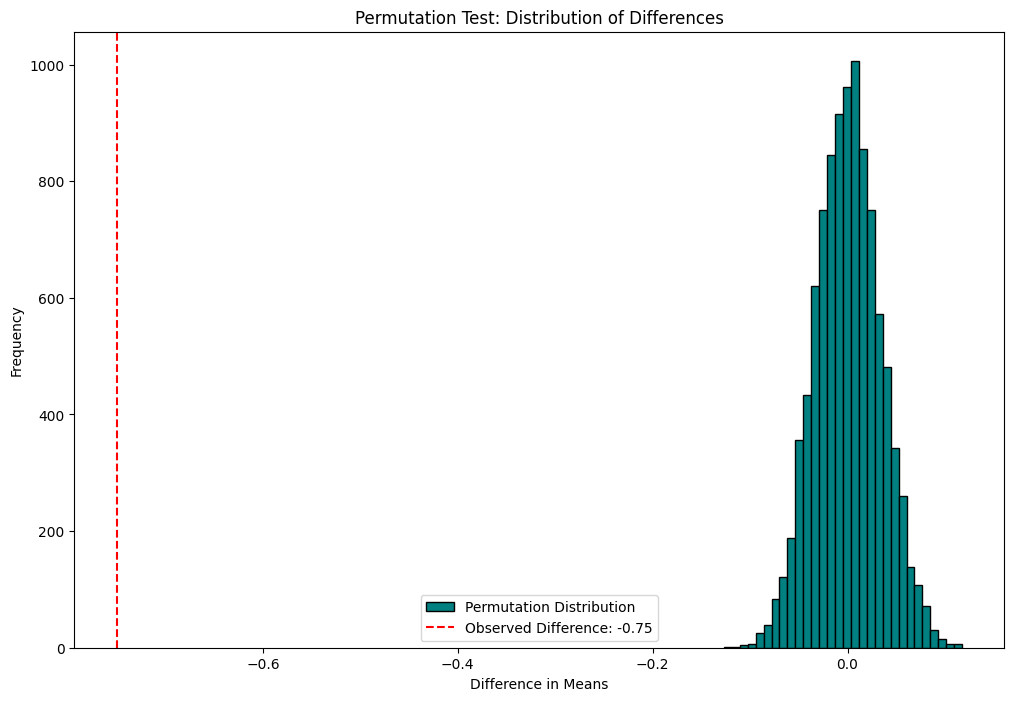

In [18]:
movies_df = movies_df.dropna(subset=["imdb_score"])
shows_df = shows_df.dropna(subset=["imdb_score"])

p, observed_diff, permuted_diffs = permutation_test(
    movies_df["imdb_score"],
    shows_df["imdb_score"],
    group1_name="movies_IMDb_score", 
    group2_name="shows_IMDb_score"
)
plot_permutations(permuted_diffs, observed_diff)

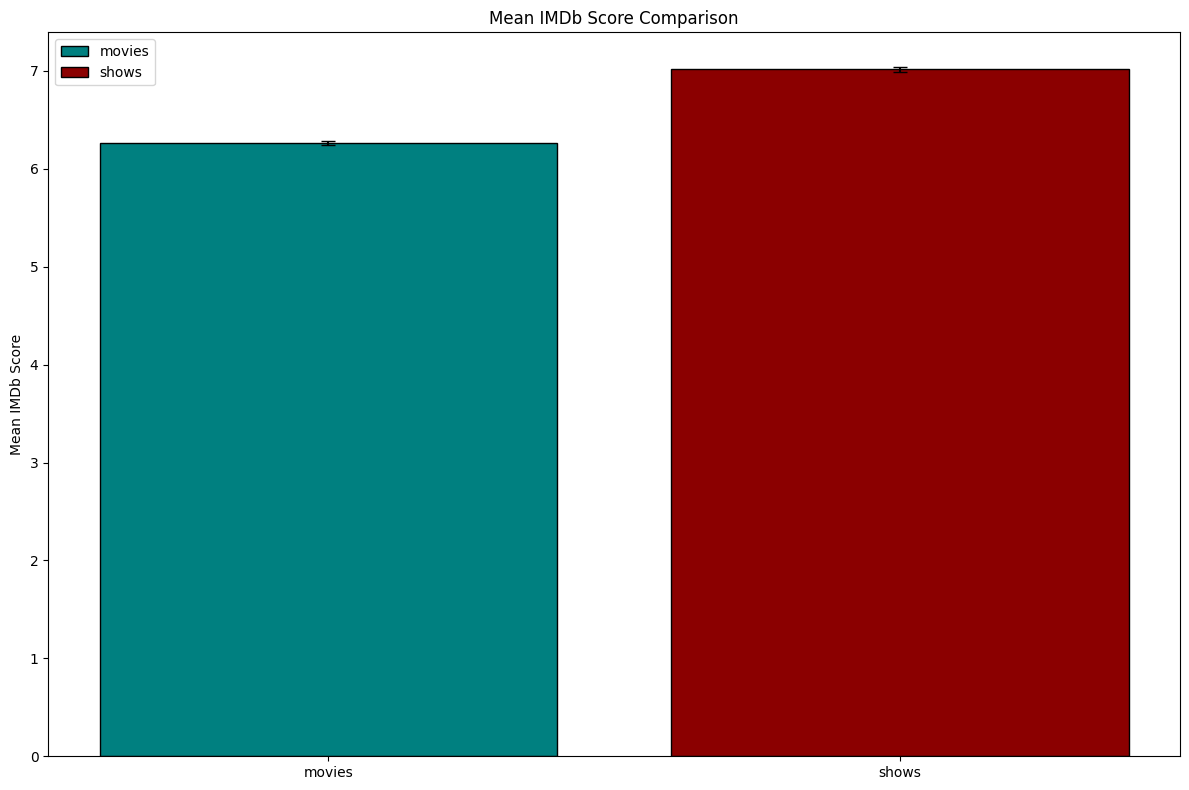

In [19]:
plot_diff(
    movies_df["imdb_score"],
    shows_df["imdb_score"],
    "movies",
    "shows",
    "Mean IMDb Score Comparison",
    "Mean IMDb Score"
    )

## Q3: Do movies or shows on Netflix get more IMDb votes (b)?

The mean of movies_IMDb_votes is larger by 9211.95 than the mean of shows_IMDb_votes, p < .001.


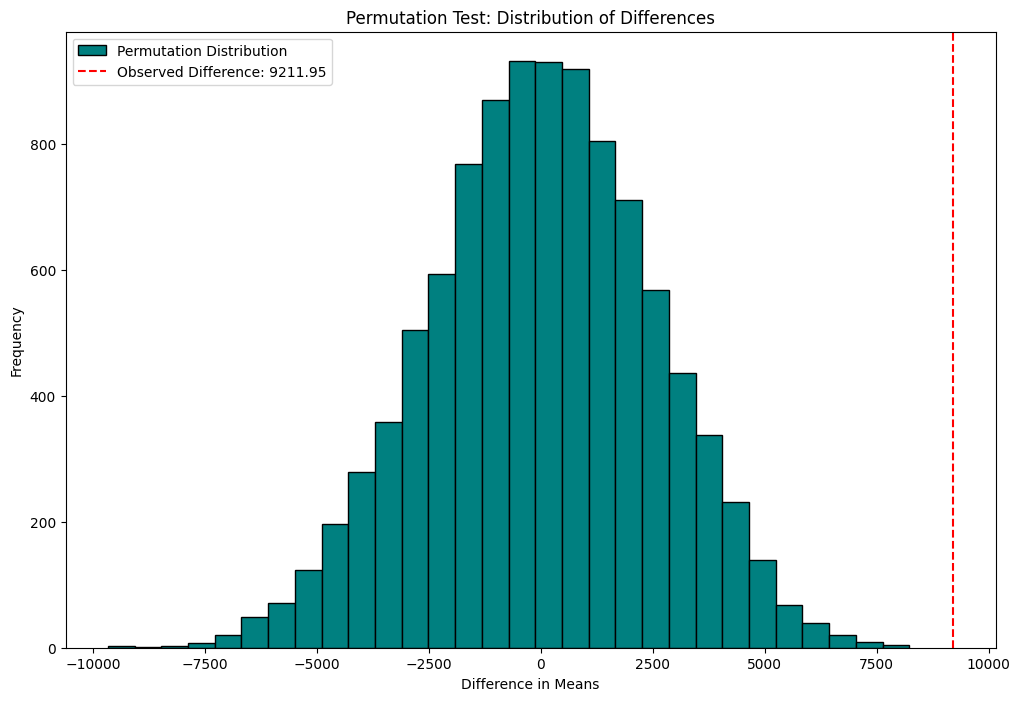

In [20]:
movies_df = movies_df.dropna(subset=["imdb_votes"])
shows_df = shows_df.dropna(subset=["imdb_votes"])

p, observed_diff, permuted_diffs = permutation_test(
    movies_df["imdb_votes"],
    shows_df["imdb_votes"],
    group1_name="movies_IMDb_votes", 
    group2_name="shows_IMDb_votes"
)
plot_permutations(permuted_diffs, observed_diff)

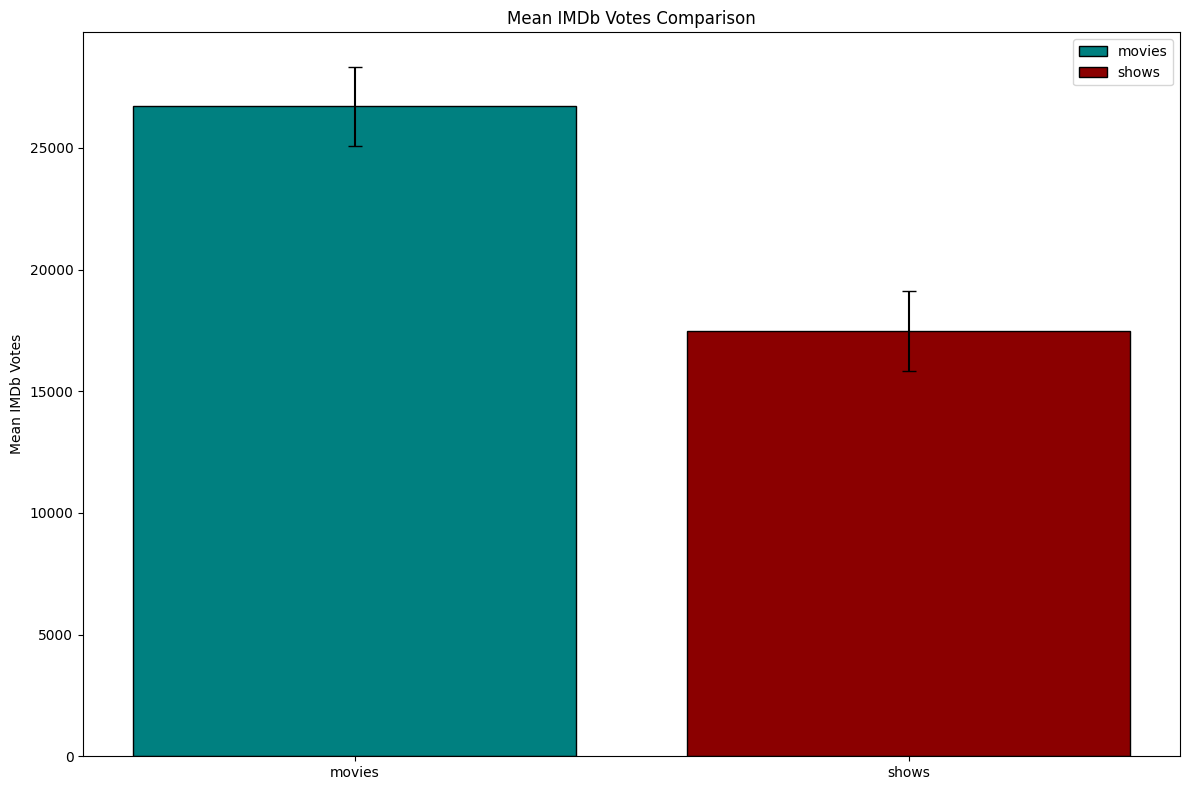

In [21]:
plot_diff(
    movies_df["imdb_votes"],
    shows_df["imdb_votes"],
    "movies",
    "shows",
    "Mean IMDb Votes Comparison",
    "Mean IMDb Votes"
    )